<blockquote><h2 style="color:#006400">Required Imports</h2></blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

import random

In [2]:
data = pd.read_csv('stress.csv')

In [3]:
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [4]:
data.shape

(2838, 116)

In [5]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [9]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [10]:
data['subreddit'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [11]:
stressTypes = data['subreddit'].value_counts()
stressTypes

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [12]:
# subredditLabelList = list(stressTypes.to_dict().keys())
# subredditValueList = list(stressTypes.to_dict().values())

# alternate way    
subredditLabelList,subredditValueList = zip(*stressTypes.to_dict().items())

In [13]:
subredditExplode = [explode/5000 for explode in subredditValueList]
subredditExplode

[0.1168, 0.1104, 0.1006, 0.0632, 0.0578, 0.049, 0.0336, 0.016, 0.0128, 0.0074]

In [14]:
subredditColor = ["#"+''.join([random.choice('0123456789ABCDEE') for j in range(6)])
             for i in range(len(stressTypes))]
print(subredditColor)

['#496ACB', '#EE76D5', '#643AB9', '#2CB474', '#79E001', '#8D9280', '#075579', '#B5B6C8', '#0E5491', '#E8CEBC']


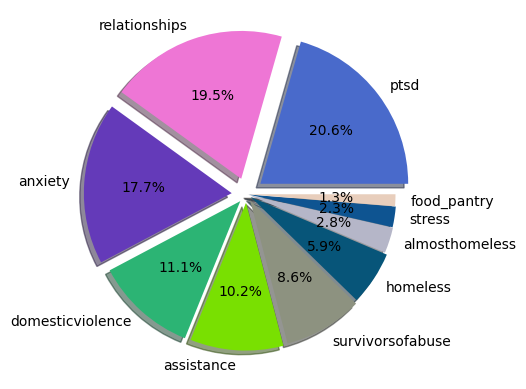

In [15]:
plt.pie(
    subredditValueList, 
    labels = subredditLabelList, 
    explode = subredditExplode,
    shadow = True,
    colors = subredditColor,
    autopct='%1.1f%%'
    )
plt.show() 

<blockquote><h2 style="color:#006400">Another Plot for better visuals</h2></blockquote>

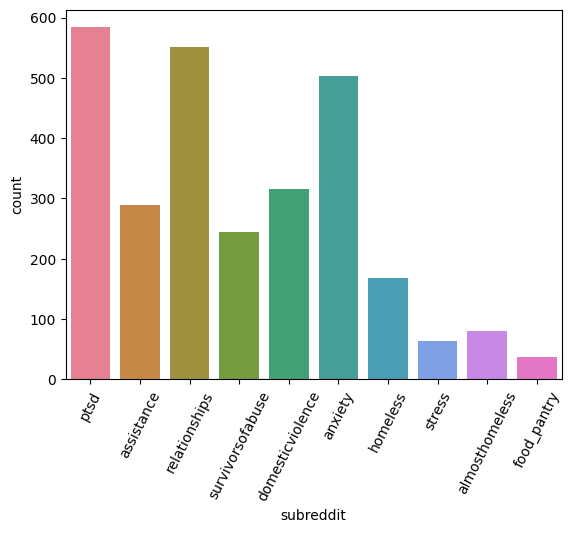

In [16]:
# count plot on single categorical variable
sns.countplot(x ='subreddit', data = data, palette = 'husl')
 
# rotating labels
plt.xticks(rotation = 63)

# Show the plot
plt.show()

In [17]:
data['label'].unique

<bound method Series.unique of 0       1
1       0
2       1
3       1
4       1
       ..
2833    0
2834    1
2835    0
2836    0
2837    1
Name: label, Length: 2838, dtype: int64>

In [18]:
data['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

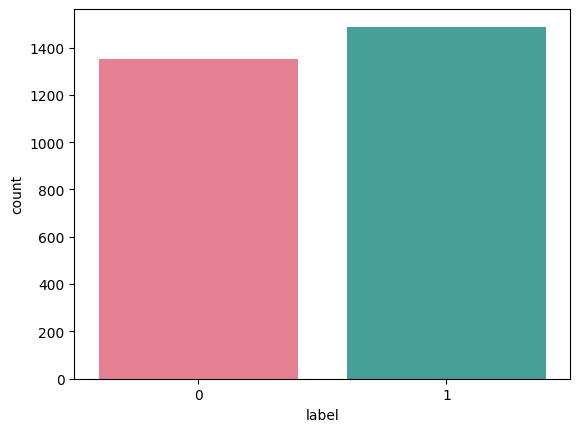

In [19]:
# count plot on single categorical variable
sns.countplot(x ='label', data = data, palette = 'husl')
 
# Show the plot
plt.show()

In [20]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text


data['text'] = data['text'].apply(clean)

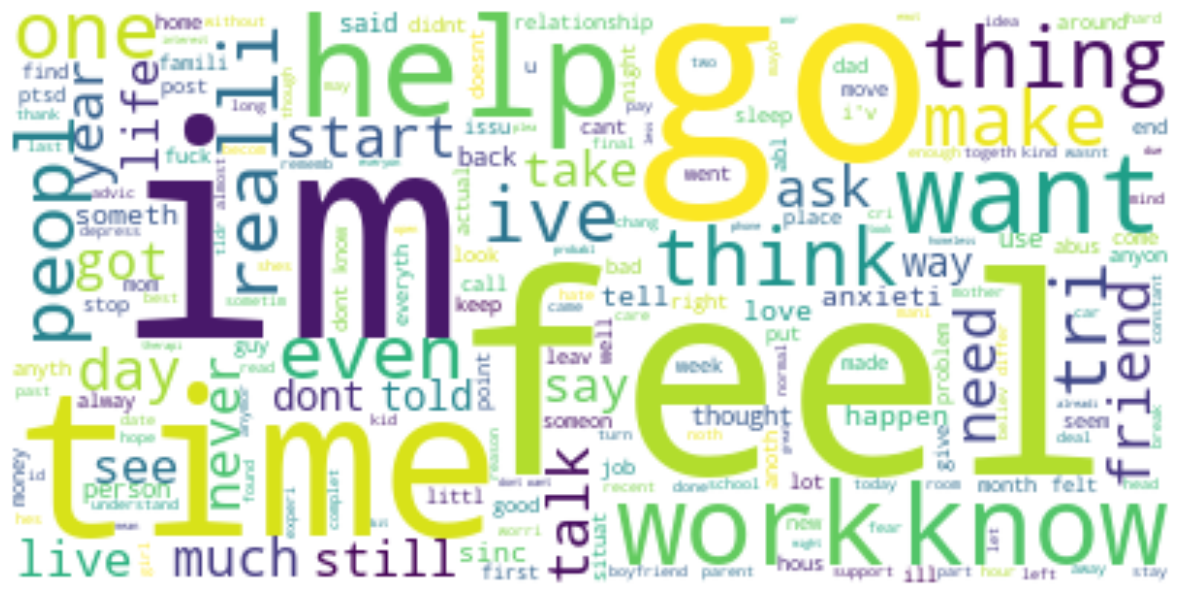

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Joining all text column data in single variable text
allText = " ".join(i for i in data.text) # data.text is a column name

# stopwordsFromLibrary contains stopwords that are coming from STOPWORDS library('a','about','above','after','again','against',) and converting it into set
stopwordsFromLibrary = set(STOPWORDS) 

# creating a wordcloud including stopwordsFromLibrary and text column
wordcloud = WordCloud(stopwords = stopwordsFromLibrary, background_color = "white").generate(allText)

# plotting wordcloud graph
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear') # interpolation=”bilinear”: used to display smoother image.

plt.axis("off") # x and y axis are off
plt.show()

In [23]:
data['label'] = data['label'].map({0: "No Stress", 1: "Stress"})

# same code below for batter understanding

# for i in range(len(data['label'])):
#     if data['label'][i] == 0:
#         data['label'][i] = "No Stress"
#     elif data['label'][i] == 1:
#         data['label'][i] = "Stress"

In [24]:
data = data[['text', 'label']]
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [26]:
x = np.array(data['text'])
y = np.array(data['label'])

In [27]:
cv = CountVectorizer()
X = cv.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size =0.33, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

<blockquote><h2 style="color:#006400">LogisticRegression</h2></blockquote>

In [29]:
model_log = LogisticRegression()
model_log.fit(xtrain, ytrain)

LogisticRegression()

In [30]:
print(f"Score of xtrain and ytrain using LogisticRegression is {(round(model_log.score(xtrain, ytrain), 4)*100)}%")
print(f"Score of xtest and ytest using LogisticRegression is {(round(model_log.score(xtest, ytest), 4)*100)}%")

Score of xtrain and ytrain using LogisticRegression is 99.63%
Score of xtest and ytest using LogisticRegression is 71.5%


<blockquote><h2 style="color:#006400">DecisionTreeClassifier</h2></blockquote>

In [31]:
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [32]:
print(f"Score of xtrain and ytrain using DecisionTreeClassifier is {(round(model_dt.score(xtrain, ytrain), 4)*100)}%")
print(f"Score of xtest and ytest using DecisionTreeClassifier is {(round(model_dt.score(xtest, ytest), 4)*100)}%")

Score of xtrain and ytrain using DecisionTreeClassifier is 100.0%
Score of xtest and ytest using DecisionTreeClassifier is 62.11%


<blockquote><h2 style="color:#006400">RandomForestClassifier</h2></blockquote>

In [33]:
model_rf= RandomForestClassifier(n_estimators= 10,
criterion="entropy")
model_rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
print(f"Score of xtrain and ytrain using RandomForestClassifier is {(round(model_rf.score(xtrain, ytrain), 4)*100)}%")
print(f"Score of xtest and ytest using RandomForestClassifier is {(round(model_rf.score(xtest, ytest), 4)*100)}%")

Score of xtrain and ytrain using RandomForestClassifier is 99.16%
Score of xtest and ytest using RandomForestClassifier is 66.92%


<blockquote><h2 style="color:#006400">BernoulliNB</h2></blockquote>

In [35]:
model_bnb = BernoulliNB()
model_bnb.fit(xtrain, ytrain)

BernoulliNB()

In [36]:
print(f"Score of xtrain and ytrain using BernoulliNB is {(round(model_bnb.score(xtrain, ytrain), 4)*100)}%")
print(f"Score of xtest and ytest using BernoulliNB is {(round(model_bnb.score(xtest, ytest), 4)*100)}%")

Score of xtrain and ytrain using BernoulliNB is 91.95%
Score of xtest and ytest using BernoulliNB is 74.71%


<blockquote><h2 style="color:#006400">Asking question with individual model</h2></blockquote>

In [42]:
def asklog(text):
    data = cv.transform([text]).toarray()
    output = model_log.predict(data)
    return output

In [43]:
def askdt(text):
    data = cv.transform([text]).toarray()
    output = model_dt.predict(data)
    return output

In [44]:
def askrf(text):
    data = cv.transform([text]).toarray()
    output = model_rf.predict(data)
    return output

In [45]:
def askbnb(text):
    data = cv.transform([text]).toarray()
    output = model_bnb.predict(data)
    return output

<blockquote><h2 style="color:#006400">All Model test</h2></blockquote>

In [46]:
question = input("Enter a Text: ")

predictlog = asklog(question)
predictdt = askdt(question)
predictrf = askrf(question)
predictbnb = askbnb(question)

print("LogisticRegression: ", predictlog)
print("DecisionTreeClassifier: ", predictdt)
print("RandomForestClassifier: ", predictrf)
print("BernoulliNB: ", predictbnb)

Enter a Text: Im in hyper tension
LogisticRegression:  ['No Stress']
DecisionTreeClassifier:  ['No Stress']
RandomForestClassifier:  ['No Stress']
BernoulliNB:  ['No Stress']
